In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

plt.rcParams.update({
    'font.size': 12  # 全局字体大小
})


def plot_response_time(csv_file_path, graph_name):
    # Load and clean data
    df = pd.read_csv(csv_file_path)
    df.columns = df.columns.str.strip().str.lower()
    df = df[["dbms", "order", "response"]]

    # === Print mean response time per DBMS per order ===
    print("\nAverage Response Time by DBMS and Order:")
    avg_response = df.groupby(["dbms", "order"])["response"].mean().unstack()
    print(avg_response.to_string(float_format="%.5f"))

    # === Compute and print speedup/slowdown ratios ===
    if 0 in avg_response.columns and 1 in avg_response.columns:
        ratio = avg_response[0] / avg_response[1]  # Unordered / Ordered
        print("\nResponse Time Ratio (Unordered / Ordered):")
        print(ratio.to_string(float_format="%.5f"))
    else:
        print("\n[Warning] One of the 'order' columns (0 or 1) is missing; ratio cannot be computed.")

    # Compute standard deviation of response time
    std_response = df.groupby(["dbms", "order"])["response"].std()

    # Prepare plotting data
    bdms_list = sorted(df["dbms"].unique())
    x_labels = []
    response_times = []
    errors = []
    bar_positions = []
    dbms_positions = {}

    position_index = 0
    bar_width = 0.4
    gap = 0.6

    denorm_colors = {0: "orange", 1: "lightblue"}

    for bdms in bdms_list:
        dbms_positions[bdms] = position_index + bar_width / 2
        x_labels.append(bdms)

        for order_value in [0, 1]:
            if (bdms, order_value) in df.set_index(["dbms", "order"]).index:
                mean_resp = df[(df["dbms"] == bdms) & (df["order"] == order_value)]["response"].mean()
                std_err = df[(df["dbms"] == bdms) & (df["order"] == order_value)]["response"].std()

                response_times.append(mean_resp)
                errors.append(std_err)
                bar_positions.append(position_index)
                position_index += bar_width


        position_index += gap

    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))

    for i, (pos, resp_time) in enumerate(zip(bar_positions, response_times)):
        order_value = i % 2
        color = denorm_colors[order_value]
        ax.bar(pos, resp_time, width=bar_width, color=color, alpha=1.0, zorder=3)

    # Add error bars
    ax.errorbar(bar_positions, response_times, yerr=errors, zorder=4, fmt='none', ecolor='black', capsize=5)

    # X-axis
    ax.set_xticks(list(dbms_positions.values()))
    ax.set_xticklabels(x_labels, rotation=45, ha="right")

    # Labels and title
    ax.set_ylabel("Response Time (s)")
    ax.set_title(graph_name)

    # Custom legend
    legend_patches = [
        mpatches.Patch(facecolor="orange", label="Without Order"),
        mpatches.Patch(facecolor="lightblue", label="With Order"),
    ]
    ax.legend(handles=legend_patches, loc="upper left")

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_response_time("covering_index5.csv", "Response Time on 10^5 Rows")



Average Response Time by DBMS and Order:
order            0       1
dbms                      
DuckDB     0.06410 0.06420
MariaDB    0.35810 0.31230
MySQL      0.18670 0.01940
PostgreSQL 0.04620 0.02670

Response Time Ratio (Unordered / Ordered):
dbms
DuckDB       0.99844
MariaDB      1.14665
MySQL        9.62371
PostgreSQL   1.73034


/var/folders/v9/nz3tpj_95ss_l8tkj3qsjvfh0000gn/T/ipykernel_22845/1017877163.py:52: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (bdms, order_value) in df.set_index(["dbms", "order"]).index:
/var/folders/v9/nz3tpj_95ss_l8tkj3qsjvfh0000gn/T/ipykernel_22845/1017877163.py:52: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (bdms, order_value) in df.set_index(["dbms", "order"]).index:
/var/folders/v9/nz3tpj_95ss_l8tkj3qsjvfh0000gn/T/ipykernel_22845/1017877163.py:52: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (bdms, order_value) in df.set_index(["dbms", "order"]).index:
/var/folders/v9/nz3tpj_95ss_l8tkj3qsjvfh0000gn/T/ipykernel_22845/1017877163.py:52: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (bdms, order_value) in df.set_index(["dbms", "order"]).index:
/var/folders/v9/nz3tpj_95ss_l8tkj3qsjvfh0000gn/T/ipykernel_22845/1017877163.py:52: PerformanceWarning: indexing 

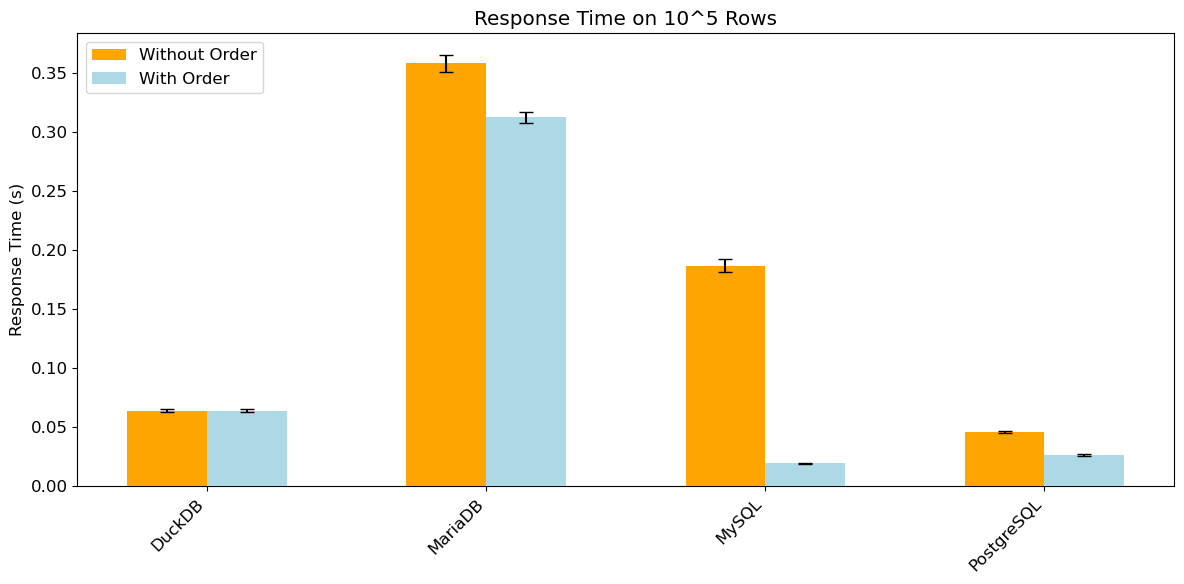

In [44]:
plot_response_time("covering_index5.csv", "Response Time on 10^5 Rows")


Average Response Time by DBMS and Order:
order             0       1
dbms                       
DuckDB      0.70360 0.66500
MariaDB     6.34860 0.31170
MySQL      29.25400 0.02070
PostgreSQL  0.76560 0.02770

Response Time Ratio (Unordered / Ordered):
dbms
DuckDB          1.05805
MariaDB        20.36766
MySQL        1413.23671
PostgreSQL     27.63899


/var/folders/v9/nz3tpj_95ss_l8tkj3qsjvfh0000gn/T/ipykernel_22845/1017877163.py:52: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (bdms, order_value) in df.set_index(["dbms", "order"]).index:
/var/folders/v9/nz3tpj_95ss_l8tkj3qsjvfh0000gn/T/ipykernel_22845/1017877163.py:52: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (bdms, order_value) in df.set_index(["dbms", "order"]).index:
/var/folders/v9/nz3tpj_95ss_l8tkj3qsjvfh0000gn/T/ipykernel_22845/1017877163.py:52: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (bdms, order_value) in df.set_index(["dbms", "order"]).index:
/var/folders/v9/nz3tpj_95ss_l8tkj3qsjvfh0000gn/T/ipykernel_22845/1017877163.py:52: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (bdms, order_value) in df.set_index(["dbms", "order"]).index:
/var/folders/v9/nz3tpj_95ss_l8tkj3qsjvfh0000gn/T/ipykernel_22845/1017877163.py:52: PerformanceWarning: indexing 

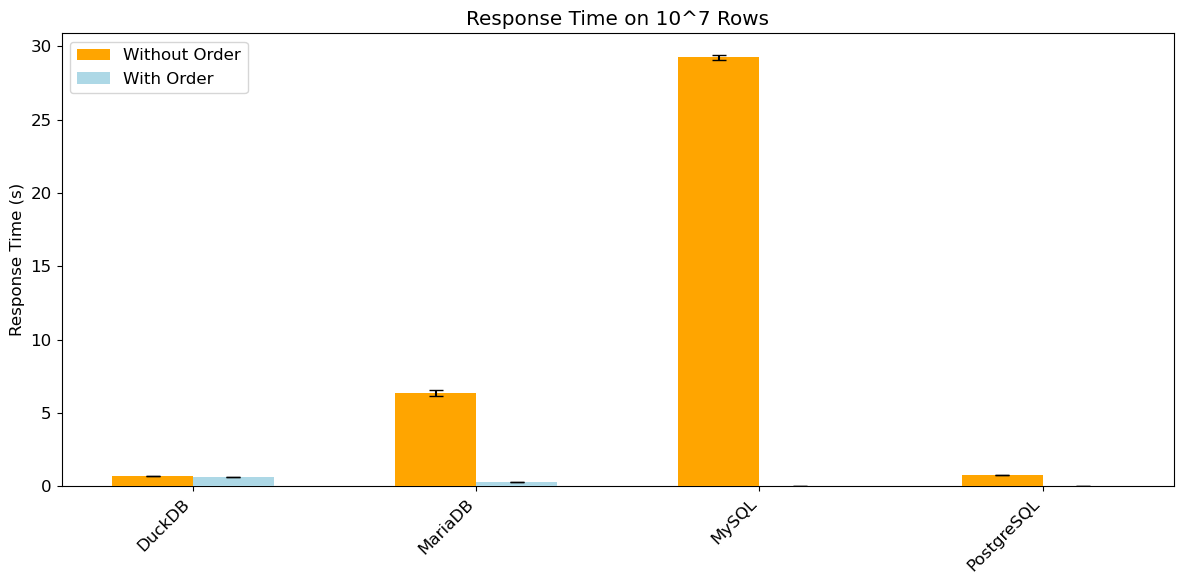

In [45]:
plot_response_time("covering_index7.csv", "Response Time on 10^7 Rows")